Ch3 p36

Repeat p34 and p35, this time for each of the other end conditions. How different are the interpolates, and which end condition give the last average error?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from naf.incf import (c_h, cubic_spline_coeff_matrix, cubic_spline_vector, solve_s_vector, 
                    cubic_spline_poly_coeffs, csisv)

In [2]:
pts = np.array([[0.15,0.1680],[0.27,0.2974],[0.76,0.7175],[0.89,0.7918],[1.07,0.8698],[2.11,0.9972]])

tb_h = ['x', 'f(x)']
print(tabulate(pts, tb_h))

   x    f(x)
----  ------
0.15  0.168
0.27  0.2974
0.76  0.7175
0.89  0.7918
1.07  0.8698
2.11  0.9972


End condition 1 (repeated):

In [3]:
h = c_h(pts[...,0])
ixv = np.array([0.33, 0.92, 2.05])
ixvg = np.linspace(0.15, 2.11)

In [25]:
def csic(pts, h, end_condition, A=0, B=0):

    cscm = cubic_spline_coeff_matrix(pts[...,0], h, end_condition)
    b = cubic_spline_vector(pts, h, end_condition, A, B)
    s = solve_s_vector(cscm, h, b, end_condition)
    pcs = cubic_spline_poly_coeffs(s, pts[...,1], h)
    iyv = csisv(ixv, pts, end_condition, A, B)

    print("Cubic Spline Coeffs")
    print(cscm)
    print("\nRight-hand-side vector")
    print(b)
    print("\nS-vector solution")
    print(s)
    print("\nPolynomial coeffs")
    print(pcs)
    print("\nInterpolates")
    print(iyv)
    
    return iyv

In [26]:
csic1 = csic(pts, h, 1)

Cubic Spline Coeffs
[[0.   1.22 0.49]
 [0.49 1.24 0.13]
 [0.13 0.62 0.18]
 [0.18 2.44 0.  ]]

Right-hand-side vector
[-1.32591837 -1.71485086 -0.82923077 -1.865     ]

S-vector solution
[ 0.         -0.67775386 -1.01848705 -0.92175019 -0.6963463   0.        ]

Polynomial coeffs
[[-0.94132481 -0.11589564  0.12402162  0.20870731  0.11159396]
 [ 0.         -0.33887693 -0.50924353 -0.4608751  -0.34817315]
 [ 1.09188841  1.05122318  0.63564415  0.50952873  0.36390005]
 [ 0.168       0.2974      0.7175      0.7918      0.8698    ]]

Interpolates
[0.3592284  0.80667671 0.9970679 ]


In [52]:
y = pts[...,1]
A = (y[1]-y[0])/h[0]
B = (y[-1]-y[-2])/h[-1]
csic2 = csic(pts, h, 2, A, B)

Cubic Spline Coeffs
[[0.   0.24 0.12]
 [0.12 1.22 0.49]
 [0.49 1.24 0.13]
 [0.13 0.62 0.18]
 [0.18 2.44 1.04]
 [1.04 2.08 0.  ]]

Right-hand-side vector
[ 0.         -1.32591837 -1.71485086 -0.82923077 -1.865       0.        ]

S-vector solution
[ 0.3584773  -0.7169546  -1.00867557 -0.86758001 -0.89001854  0.44500927]

Polynomial coeffs
[[-1.49365542 -0.09922482  0.18089174 -0.02077641  0.21394676]
 [ 0.17923865 -0.3584773  -0.50433779 -0.43379001 -0.44500927]
 [ 1.07833333  1.0568247   0.6340453   0.51208869  0.35390482]
 [ 0.168       0.2974      0.7175      0.7918      0.8698    ]]

Interpolates
[0.35949753 0.80677169 0.9906048 ]


In [53]:
csic3 = csic(pts, h, 3)

Cubic Spline Coeffs
[[0.   1.34 0.49]
 [0.49 1.24 0.13]
 [0.13 0.62 0.18]
 [0.18 3.48 0.  ]]

Right-hand-side vector
[-1.32591837 -1.71485086 -0.82923077 -1.865     ]

S-vector solution
[-0.60935554 -0.60935554 -1.03955498 -0.97860362 -0.48530211 -0.48530211]

Polynomial coeffs
[[ 0.         -0.14632634  0.07814278  0.45676065  0.        ]
 [-0.30467777 -0.30467777 -0.51977749 -0.48930181 -0.24265106]
 [ 1.11489467  1.041772    0.63778892  0.50660861  0.3748571 ]
 [ 0.168       0.2974      0.7175      0.7918      0.8698    ]]

Interpolates
[0.35877787 0.80657022 1.00411788]


In [54]:
csic4 = csic(pts, h, 4)

Cubic Spline Coeffs
[[ 0.          1.36938776  0.46061224]
 [ 0.49        1.24        0.13      ]
 [ 0.13        0.62        0.18      ]
 [-5.82888889  9.48888889  0.        ]]

Right-hand-side vector
[-1.32591837 -1.71485086 -0.82923077 -1.865     ]

S-vector solution
[-0.5120359  -0.61683518 -1.04476558 -0.90071004 -0.74983898  0.1218605 ]

Polynomial coeffs
[[-0.14555456 -0.14555456  0.18468658  0.13969543  0.13969543]
 [-0.25601795 -0.30841759 -0.52238279 -0.45035502 -0.37491949]
 [ 1.11115147  1.04341921  0.63632702  0.50987111  0.36132169]
 [ 0.168       0.2974      0.7175      0.7918      0.8698    ]]

Interpolates
[0.35886341 0.80669459 0.9953028 ]


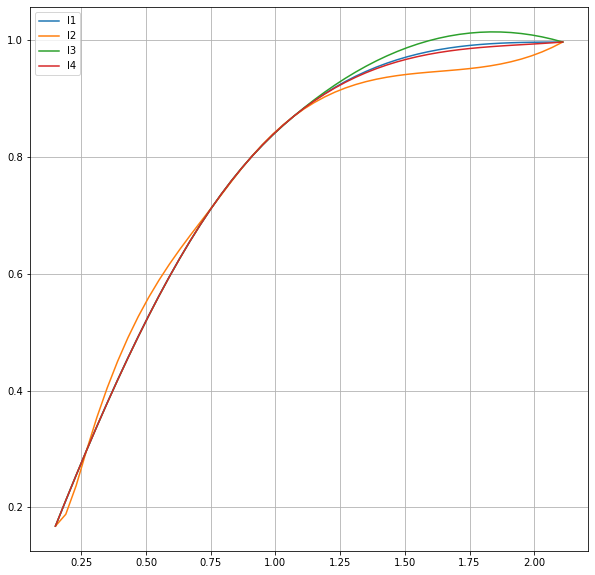

In [55]:
iyv1 = csisv(ixvg, pts, 1)
iyv2 = csisv(ixvg, pts, 2)
iyv3 = csisv(ixvg, pts, 3)
iyv4 = csisv(ixvg, pts, 4)

fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
ax.plot(ixvg, iyv1, label="l1")
ax.plot(ixvg, iyv2, label="l2")
ax.plot(ixvg, iyv3, label="l3")
ax.plot(ixvg, iyv4, label="l4")
ax.legend()
plt.show()

Without the ERF(x) function data there is no way to absolutely determine the error. However, one can determine the relative error. Here I will assume the interpolates from end condition 1 is the "correct" value and I will calculate the relative error for the other end conditions.

In [56]:
diff1_2 = csic1 - csic2
diff1_3 = csic1 - csic3
diff1_4 = csic1 - csic4
print(diff1_2)
print(diff1_3)
print(diff1_4)

[-2.69130551e-04 -9.49792167e-05  6.46309301e-03]
[ 0.00045053  0.00010649 -0.00704998]
[ 3.64990968e-04 -1.78758955e-05  1.76509552e-03]


From this comparision the ordering is as follows from smallest to largest relative error:

Iterate 1: EC2, EC4, EC3

Iterate 2: EC4, EC2, EC3

Iterate 3: EC4, EC2, EC3